<a href="https://colab.research.google.com/github/masuodheidari/KidBook/blob/main/ColabNotebooks/KidBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Swap Your Face With Cartoonized Face

**If you want to use the latest version remove `!git checkout 312208a41102ba86d2454ae8efc9d3f0b786a6e7`**

In [1]:
!git clone https://github.com/masuodheidari/KidBook.git
%cd KidBook
#Tested and updated 23 August 2023 commit
#!git checkout da1ef285f1d43bd0cc8b9cdb9a0f80f7ae793a97
!pip install onnxruntime-gpu && pip install -r requirements.txt

fatal: destination path 'KidBook' already exists and is not an empty directory.
/content/KidBook
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Ignoring tkinterdnd2-universal: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
Ignoring onnxruntime: markers 'python_version != "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-coreml: markers 'python_version == "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-silicon: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment


**You will see processing message at the end of below printed messages e.g. Processing:  43% 136/318 00:38<00:24, 7.47frame/s**

**Make sure to upload root roop folder not inside the sub roop folder and don't forget to change image and video file names**

**1 is best quality big video size, 100 worst quality low video size**

cmd:run.py --execution-provider cuda -s /content/KidBook/Sources/celea.jpg -t /content/KidBook/Targets/k28.jpg -o /content/KidBook/Swap-Res.jpg --frame-processor face_swapper face_enhancer --keep-frames --similar-face-distance 3 --keep-fps --execution-threads 16
Downloading: 529MB [00:03, 182MB/s]               
Downloading: 332MB [00:01, 198MB/s]               
download_path: /root/.insightface/models/buffalo_l
100% 281857/281857 [00:03<00:00, 73611.30KB/s]
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'device_id': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0', 'enable_skip_

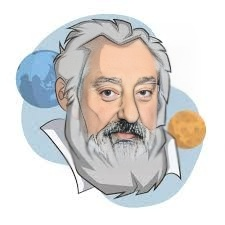

In [2]:
#@title 3.Get source and target image or video, and start to replace
import os, sys
from PIL import Image
from IPython.display import display

source = "/content/KidBook/Sources/celea.jpg" #@param {type:"string"}
target = "/content/KidBook/Targets/k28.jpg" #@param {type:"string"}
output = "/content/KidBook/Swap-Res.jpg" #@param {type:"string"}

Device = "cuda" #@param ["cuda", "cpu"]

Processor = "face_swapper face_enhancer"

VideoEncoder = "libx264"

VideoQuality = "18"

if os.path.exists(source) and os.path.exists(target):
    cmd = f"run.py --execution-provider {Device} -s {source} -t {target} -o {output} --frame-processor {Processor} --keep-frames --similar-face-distance 3 --keep-fps --execution-threads 16"
    print("cmd:"+cmd)
    !python $cmd
    img = Image.open(output)

    display(img)
else:
    print("Source or target file does not exist.")
